# Intervalos de confiança e classificação

In [1]:
import pandas as pd
import numpy as np
import seaborn as srn
import matplotlib.pyplot as plt
srn.set()
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold

In [2]:
dataset = pd.read_csv('Bases de dados/credit_data.csv')
dataset.dropna(inplace=True)
print(dataset.shape)
dataset.head()

(1997, 5)


,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [3]:
X = dataset.iloc[:, 1:4].values
y = dataset.iloc[:, 4].values
X.shape, y.shape

((1997, 3), (1997,))

In [7]:
resultados_naive_bayes_cv = []
resultados_naive_bayes_cv_300 = []
resultados_logistica_cv = []
resultados_logistica_cv_300 = []
resultados_forest_cv = []
resultados_forest_cv_300 = []

for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)
    
    naive_bayes = GaussianNB()
    scores = cross_val_score(naive_bayes, X, y, cv=kfold)
    resultados_naive_bayes_cv_300.append(scores)
    resultados_naive_bayes_cv.append(scores.mean())
    
    logistic = LogisticRegression()
    scores = cross_val_score(logistic, X, y, cv=kfold)
    resultados_logistica_cv_300.append(scores)
    resultados_logistica_cv.append(scores.mean())
    
    forest = RandomForestClassifier()
    scores = cross_val_score(forest, X, y, cv=kfold)
    resultados_forest_cv_300.append(scores)
    resultados_forest_cv.append(scores.mean())

In [8]:
resultados_naive_bayes_cv = np.array( resultados_naive_bayes_cv)
resultados_naive_bayes_cv_300 = np.array(np.asarray(resultados_naive_bayes_cv_300).reshape(-1))
resultados_logistica_cv = np.array(resultados_logistica_cv)
resultados_logistica_cv_300 = np.array(np.asarray(resultados_logistica_cv_300).reshape(-1))
resultados_forest_cv = np.array(resultados_forest_cv)
resultados_forest_cv_300 = np.array(np.asarray(resultados_forest_cv_300).reshape(-1))

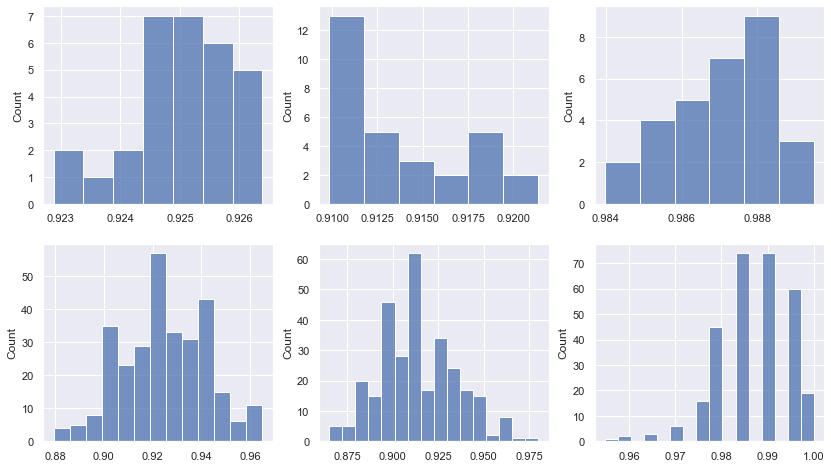

In [9]:
fig, ax = plt.subplots(2, 3, figsize=(14,8))
srn.histplot(resultados_naive_bayes_cv, ax=ax[0,0]);
srn.histplot(resultados_naive_bayes_cv_300, ax=ax[1,0]);
srn.histplot(resultados_logistica_cv, ax=ax[0,1]);
srn.histplot(resultados_logistica_cv_300, ax=ax[1,1] );
srn.histplot(resultados_forest_cv, ax=ax[0,2]);
srn.histplot(resultados_forest_cv_300, ax=ax[1,2]);